In [77]:
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils import multi_gpu_model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

np.random.seed(1337)

In [78]:
import os
import pandas as pd
from PIL import Image

In [79]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [80]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.utils import np_utils

In [81]:
TRAIN_DIR_PREV = '../data/train_small/'
TEST_DIR_PREV = '../data/test_small/'

LABELS_DIR = '../labels/trainLabels_master_256_v2.csv'

# Specify parameters before model is run.
batch_size = 512
nb_classes = 2
nb_epoch = 2

ROWS = 256
COLS = 256
CHANNELS = 3

img_rows, img_cols = 256, 256
channels = 3

nb_filters = 32
#kernel_size = (8, 8)
kernel_size = (1, 1)

train_data=[]
test_data=[]

In [82]:
def split_data(X, y, test_data_size):
    """
    Split data into test and training datasets.

    INPUT
        X: NumPy array of arrays
        y: Pandas series, which are the labels for input array X
        test_data_size: size of test/train split. Value from 0 to 1

    OUPUT
        Four arrays: X_train, X_test, y_train, and y_test
    """
    return train_test_split(X, y, test_size=test_data_size, random_state=42)

In [83]:
def reshape_data(arr, img_rows, img_cols, channels):
    """
    Reshapes the data into format for CNN.

    INPUT
        arr: Array of NumPy arrays.
        img_rows: Image height
        img_cols: Image width
        channels: Specify if the image is grayscale (1) or RGB (3)

    OUTPUT
        Reshaped array of NumPy arrays.
    """
    return arr.reshape(arr.shape[0], img_rows, img_cols, channels)

In [84]:
def get_lst_images_fullpath(file_path):
    """
    Reads in all files from file path into a list.

    INPUT
        file_path: specified file path containing the images.

    OUTPUT
        List of image strings
    """
    #return [i for i in os.listdir(file_path) if i != '.DS_Store']
    return [file_path+i for i in os.listdir(file_path)]

In [85]:
def get_lst_images_name(file_path):
    """
    Reads in all files from file path into a list.

    INPUT
        file_path: specified file path containing the images.

    OUTPUT
        List of image strings
    """
    return [str(i).split('.')[0].strip().replace("'","") for i in os.listdir(file_path) if i != '.DS_Store']
    

In [86]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
def read_image_only(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return img;

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

In [87]:
def save_model(model, score, model_name):
    """
    Saves Keras model to an h5 file, based on precision_score

    INPUT
        model: Keras model object to be saved
        score: Score to determine if model should be saved.
        model_name: name of model to be saved
    """

    if score >= 0.75:
        print("Saving Model")
        model.save("../models/" + model_name + "_recall_" + str(round(score, 4)) + ".h5")
    else:
        print("Model Not Saved.  Score: ", score)

In [89]:
train_images = []
test_images = []

train_images = get_lst_images_fullpath(TRAIN_DIR_PREV);
#[TRAIN_DIR_PREV+i for i in os.listdir(TRAIN_DIR_PREV)] # use this for full dataset
test_images =  get_lst_images_fullpath(TEST_DIR_PREV);
#[TEST_DIR_PREV+i for i in os.listdir(TEST_DIR_PREV)]

len(train_images)
print(train_images[0],test_images[0])

../data/train_small/10_left.jpeg ../data/test_small/10_left.jpeg


In [90]:
train_images_names = []
test_images_names = []

train_images_names = get_lst_images_name(TRAIN_DIR_PREV);
#[TRAIN_DIR_PREV+i for i in os.listdir(TRAIN_DIR_PREV)] # use this for full dataset
test_images_names =  get_lst_images_name(TEST_DIR_PREV);
#[TEST_DIR_PREV+i for i in os.listdir(TEST_DIR_PREV)]

len(test_images_names)
print(train_images_names[0], len(train_images_names))

10_left 34


In [91]:
# Import data
##not in use.
unique_lst_imgs=[]
labels = []
labels = pd.read_csv(LABELS_DIR)
unique_lst_imgs = labels['image'].unique()
unique_lst_imgs_withoutjpeg = []
unique_lst_imgs_withoutjpeg = [u.replace('.jpeg','') for u in unique_lst_imgs]
unique_lst_imgs_withoutjpeg[100]

'114_left'

In [92]:
print(len(unique_lst_imgs),len(unique_lst_imgs_withoutjpeg))

34723 34723


In [93]:
###############
#get preview image names list and convert it into data frame and extract the unique preview 
###image names list
#convert preview images list into data frame, to parse the unique values.
dfPreview_Image_train = pd.DataFrame({'preview_image':train_images_names})
#dfPreview_Image_train[dfPreview_Image_train['preview_image']==unique_lst_imgs_withoutjpeg[100]]
unique_lst_prev_imgs = []
unique_lst_prev_imgs = dfPreview_Image_train['preview_image'].unique()
len(unique_lst_prev_imgs)

34

In [94]:
#get image level
img_level = labels[labels[['image','level']].image == ('58_right.jpeg')].values.tolist()[0][1];
img_level
#labels['image']==unique_lst_imgs[0]
img_level = labels[labels[['image','level']].image == unique_lst_prev_imgs[0]+'.jpeg'].values.tolist()[0][1];
img_level

0.0

In [95]:
##get unique image , level and assign it against the processed images.
train_labels = [];
train_labels_not_exist = [];
for previmg in unique_lst_prev_imgs:
    #get ratinopathy level from labels list.
    img_levels = []
    img_levels = labels[labels[['image','level']].image == previmg+'.jpeg'].values.tolist();
    if len(img_levels) > 0:
        img_level = img_levels[0][1];
        lst_prev_imgs = dfPreview_Image_train[dfPreview_Image_train['preview_image']==previmg].values.tolist()
        print('unique image name: ', previmg);
        if(len(lst_prev_imgs) > 0):
            print('Image name exist in preview list');
        else:
            print('??? Image not exist in preview list')
        for prv_img in lst_prev_imgs:
            if img_level > 0:
                    train_labels.append(1);
                    print('!!! - Ratino pathy level : ', img_level)
            else:
                train_labels.append(0);
                print('@@@ - Ratino pathy level : ', img_level)
    else:
        print('preview image not exist in labels list : ', previmg);
        train_labels_not_exist.append(previmg);
        img_level = 0;
        lst_prev_imgs = dfPreview_Image_train[dfPreview_Image_train['preview_image']==previmg].values.tolist()
        for prv_img in lst_prev_imgs:
            if img_level > 0:
                    train_labels.append(1);
                    print('!!! - Ratino pathy level : ', img_level)
            else:
                train_labels.append(0);
                print('@@@ - Ratino pathy level : ', img_level)
        
            

unique image name:  10_left
Image name exist in preview list
@@@ - Ratino pathy level :  0.0
unique image name:  10_right
Image name exist in preview list
@@@ - Ratino pathy level :  0.0
unique image name:  13_left
Image name exist in preview list
@@@ - Ratino pathy level :  0.0
unique image name:  13_right
Image name exist in preview list
@@@ - Ratino pathy level :  0.0
unique image name:  15_left
Image name exist in preview list
!!! - Ratino pathy level :  1.0
unique image name:  15_right
Image name exist in preview list
!!! - Ratino pathy level :  2.0
unique image name:  16_left
Image name exist in preview list
!!! - Ratino pathy level :  4.0
unique image name:  16_right
Image name exist in preview list
!!! - Ratino pathy level :  4.0
unique image name:  17_left
Image name exist in preview list
@@@ - Ratino pathy level :  0.0
unique image name:  17_right
Image name exist in preview list
!!! - Ratino pathy level :  1.0
unique image name:  19_left
Image name exist in preview list
@@@ 

In [96]:
print(len(train_labels))
train_labels_temp = train_labels

34


In [105]:
train = []
tesst = []
train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 34
Processed 0 of 12
Train shape: (34, 3, 256, 256)
Test shape: (12, 3, 256, 256)


In [115]:
print("Splitting data into test/ train datasets")
X_train, X_test, y_train, y_test = split_data(train, train_labels, 0.2)

print("Reshaping Data")
#X_train = reshape_data(X_train, img_rows, img_cols, channels)
#X_test = reshape_data(X_test, img_rows, img_cols, channels)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Length :", len(y_train));

Splitting data into test/ train datasets
Reshaping Data
X_train Shape:  (27, 3, 256, 256)
X_test Shape:  (7, 3, 256, 256)
y_train Length : 27


In [107]:
#input_shape = (img_rows, img_cols, channels)

print("Normalizing Data")
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Normalizing Data


In [108]:

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (27, 3, 256, 256)
X_test Shape:  (7, 3, 256, 256)


In [109]:
X_train_bkup = X_train
X_test_bkup = X_test
y_train = train_labels

In [116]:
##run  only once.
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

y_train Shape:  (27, 2)
y_test Shape:  (7, 2)


In [117]:

print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

y_train Shape:  (27, 2)
y_test Shape:  (7, 2)


In [118]:
def cnn_model(X_train, y_train, kernel_size, nb_filters, channels, nb_epoch, batch_size, nb_classes, nb_gpus):
    """
    Define and run the Convolutional Neural Network

    INPUT
        X_train: Array of NumPy arrays
        X_test: Array of NumPy arrays
        y_train: Array of labels
        y_test: Array of labels
        kernel_size: Initial size of kernel
        nb_filters: Initial number of filters
        channels: Specify if the image is grayscale (1) or RGB (3)
        nb_epoch: Number of epochs
        batch_size: Batch size for the model
        nb_classes: Number of classes for classification

    OUTPUT
        Fitted CNN model
    """

    model = Sequential()

    model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     strides=1,
                     #input_shape=(img_rows, img_cols, channels), activation="relu"))
                     input_shape=(channels,img_rows, img_cols), activation="relu"))

    model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]), activation="relu"))

    model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]), activation="relu"))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    print("Model flattened out to: ", model.output_shape)

    model.add(Dense(128))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.25))

    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    #model = multi_gpu_model(model, gpus=nb_gpus)

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    stop = EarlyStopping(monitor='val_acc',
                         min_delta=0.001,
                         patience=2,
                         verbose=0,
                         mode='auto')

    tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

    model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,
              verbose=1,
              validation_split=0.2,
              class_weight='auto',
              callbacks=[stop, tensor_board])

    return model

In [119]:
print("Training Model")

model = cnn_model(X_train, y_train, kernel_size, nb_filters, channels, nb_epoch, batch_size,
                  nb_classes, nb_gpus=1)

Training Model
Model flattened out to:  (None, 524288)
Train on 21 samples, validate on 6 samples
Epoch 1/2
21/21 [==============================] - 125s 6s/step - loss: 0.5100 - acc: 0.8095 - val_loss: 1.1734 - val_acc: 0.8333
Epoch 2/2
21/21 [==============================] - 38s 2s/step - loss: 1.2968 - acc: 0.8095 - val_loss: 1.2374 - val_acc: 0.8333


In [120]:
print("Predicting")
y_pred = model.predict(X_test)

Predicting


In [122]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.000385014136555
Test accuracy: 1.0


In [123]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)

save_model(model=model, score=recall, model_name="DR_Two_Classes")
print("Completed")

Precision:  0.0
Recall:  0.0
Model Not Saved.  Score:  0.0
Completed


0 [[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
I am 100.00% sure this is Non Ratinopathy eye


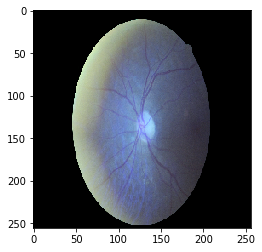

0 [[[ 79  80  82 ..., 104 101 100]
  [ 77  79  81 ..., 105 105 108]
  [ 79  81  80 ..., 103 107 107]
  ..., 
  [ 71  71  67 ...,  84  85  85]
  [ 68  71  67 ...,  81  83  83]
  [ 65  70  67 ...,  84  84  85]]

 [[117 119 122 ..., 152 149 148]
  [115 118 121 ..., 153 153 153]
  [117 119 119 ..., 150 152 152]
  ..., 
  [104 104 100 ..., 123 122 122]
  [101 104 100 ..., 120 120 120]
  [ 98 103 100 ..., 121 121 122]]

 [[151 151 151 ..., 164 161 160]
  [149 150 150 ..., 165 165 166]
  [151 153 151 ..., 164 166 165]
  ..., 
  [154 154 150 ..., 175 174 174]
  [151 154 150 ..., 172 172 172]
  [148 153 150 ..., 173 173 174]]]
I am 100.00% sure this is Non Ratinopathy eye


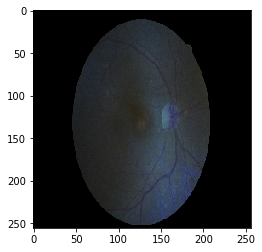

0 [[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
I am 100.00% sure this is Non Ratinopathy eye


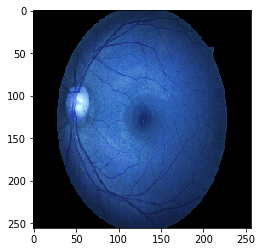

0 [[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
I am 100.00% sure this is Non Ratinopathy eye


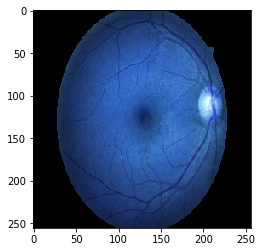

0 [[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 1 1]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 2 1]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 1]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
I am 100.00% sure this is Non Ratinopathy eye


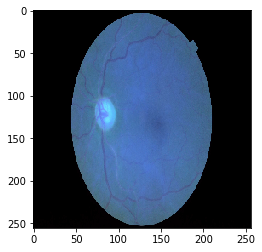

0 [[[0 0 0 ..., 0 2 2]
  [0 0 0 ..., 0 2 2]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 2]
  [0 0 0 ..., 0 0 4]
  [0 0 0 ..., 0 0 5]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 1 0 0]
  [1 1 0 ..., 1 1 0]
  [1 1 0 ..., 1 1 0]]

 [[3 3 1 ..., 0 0 0]
  [3 1 1 ..., 0 0 0]
  [1 1 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
I am 100.00% sure this is Non Ratinopathy eye


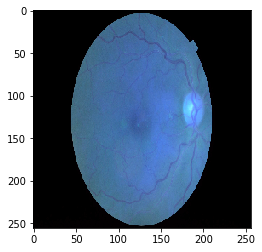

In [130]:
for i in range(0,6):
    print(y_pred[i], X_test[i])
    if y_pred[i] > 0: 
        print(predictions[i])
        print('I am {:.2%} sure this is a eye has ratinopathy.'.format(y_pred[i]))
        plt.imshow(test[i].T)
        plt.show()
    else: 
        print('I am {:.2%} sure this is Non Ratinopathy eye'.format(1-y_pred[i]))
        plt.imshow(test[i].T)
        plt.show()